In [ ]:
import requests
from secret import FDAKEY
import random

## RNorm


In [39]:
content = requests.get('https://rxnav.nlm.nih.gov/REST/drugs.json?name=tylenol').json()

In [40]:
for i in content['drugGroup']['conceptGroup']:
    try: 
        for j in i['conceptProperties']:
            print(j['rxcui'], j['name'])
    except KeyError:
        pass

1243440 8 HR acetaminophen 650 MG Extended Release Oral Tablet [Tylenol]
1738139 acetaminophen 325 MG Oral Capsule [Tylenol]
209387 acetaminophen 325 MG Oral Tablet [Tylenol]
209459 acetaminophen 500 MG Oral Tablet [Tylenol]
2178758 acetaminophen 160 MG Oral Powder [Tylenol]
2374361 acetaminophen 500 MG Oral Powder [Tylenol]
828555 acetaminophen 32 MG/ML Oral Suspension [Tylenol]
828557 acetaminophen 160 MG Chewable Tablet [Tylenol]


In [37]:
def getRxNorm(query_str):
    query_str = [i.strip() for i in query_str.split(',')]
    cui_name = {}
    for q in query_str:
        content = requests.get(f'https://rxnav.nlm.nih.gov/REST/drugs.json?name={q}').json()
        for i in content['drugGroup']['conceptGroup']:
            try: 
                for j in i['conceptProperties']:
                    # cui_name.append([j['rxcui'], j['name']])
                    cui_name[j['rxcui']] = j['name']
            except KeyError:
                pass
    return cui_name
    
getRxNorm('sildenafil, tylenol')

{'1307431': 'sildenafil 10 MG/ML Oral Suspension [Revatio]',
 '213269': 'sildenafil 25 MG Oral Tablet [Viagra]',
 '213270': 'sildenafil 50 MG Oral Tablet [Viagra]',
 '213271': 'sildenafil 100 MG Oral Tablet [Viagra]',
 '2637056': 'sildenafil citrate 10 MG/ML Oral Suspension [Liqrev]',
 '581645': 'sildenafil 20 MG Oral Tablet [Revatio]',
 '882530': '12.5 ML sildenafil 0.8 MG/ML Injection [Revatio]',
 '1307427': 'sildenafil 10 MG/ML Oral Suspension',
 '2637050': 'sildenafil citrate 10 MG/ML Oral Suspension',
 '312950': 'sildenafil 50 MG Oral Tablet',
 '314228': 'sildenafil 25 MG Oral Tablet',
 '314229': 'sildenafil 100 MG Oral Tablet',
 '577033': 'sildenafil 20 MG Oral Tablet',
 '882527': '12.5 ML sildenafil 0.8 MG/ML Injection',
 '1243440': '8 HR acetaminophen 650 MG Extended Release Oral Tablet [Tylenol]',
 '1738139': 'acetaminophen 325 MG Oral Capsule [Tylenol]',
 '209387': 'acetaminophen 325 MG Oral Tablet [Tylenol]',
 '209459': 'acetaminophen 500 MG Oral Tablet [Tylenol]',
 '2178758

## FDA API

In [ ]:
# count patient sex
# https://api.fda.gov/drug/event.json?search=patient.drug.openfda.rxcui:%22207106%22&count=patient.patientsex

# count patient onstage age
# https://api.fda.gov/drug/event.json?search=patient.drug.openfda.rxcui:%22207106%22&count=patient.patientonsetage

In [ ]:
def getFda(query_cui):
    content = requests.get('https://api.fda.gov/drug/event.json?search=patient.drug.openfda.rxcui:\'581645\'').json()

In [23]:
content = requests.get('https://api.fda.gov/drug/event.json?search=patient.drug.openfda.rxcui:\'581645\'').json()

In [ ]:
content

## RXInteraction

In [38]:
content = requests.get('https://rxnav.nlm.nih.gov/REST/interaction/list.json?rxcuis=207106+152923+656659+828557+828555+209387+1738139').json()

In [ ]:
content

In [41]:
len(content['fullInteractionTypeGroup'][0])

3

In [66]:
for i in content['fullInteractionTypeGroup']:
    for j in i['fullInteractionType']:
        print(i['sourceName'],
              j['minConcept'][0]['rxcui'],
              j['minConcept'][0]['name'],
              j['minConcept'][1]['rxcui'],
              j['minConcept'][1]['name'],
              j['interactionPair'][0]['severity'],  
              j['interactionPair'][0]['description'])

DrugBank 1738139 acetaminophen 325 MG Oral Capsule [Tylenol] 207106 fluconazole 50 MG Oral Tablet [Diflucan] N/A The metabolism of Acetaminophen can be decreased when combined with Fluconazole.
DrugBank 152923 simvastatin 40 MG Oral Tablet [Zocor] 828555 acetaminophen 32 MG/ML Oral Suspension [Tylenol] N/A The metabolism of Simvastatin can be decreased when combined with Acetaminophen.
DrugBank 152923 simvastatin 40 MG Oral Tablet [Zocor] 656659 bosentan 125 MG Oral Tablet N/A The serum concentration of Simvastatin can be decreased when it is combined with Bosentan.
DrugBank 207106 fluconazole 50 MG Oral Tablet [Diflucan] 828557 acetaminophen 160 MG Chewable Tablet [Tylenol] N/A The metabolism of Acetaminophen can be decreased when combined with Fluconazole.
DrugBank 207106 fluconazole 50 MG Oral Tablet [Diflucan] 209387 acetaminophen 325 MG Oral Tablet [Tylenol] N/A The metabolism of Acetaminophen can be decreased when combined with Fluconazole.
DrugBank 152923 simvastatin 40 MG Oral 

In [81]:
class Edge:
    def __init__(self, src, dest, source, severity, additional_info):
        self.src = src # source
        self.dest = dest # destination 
        self.source = source  # source of info
        self.severity = severity  # severity of interaction
        self.additional_info = additional_info  # description of interaction

    def __str__(self):
        return f"{self.src.id} and {self.dest.id} has interaction \"{self.additional_info}\"\n"

class Vertex:
    def __init__(self, value, name):
        self.id = value # RxNorm CUI
        # TODO: Name
        self.name = name
        # TODO: User choices - implemented patient sex agg. only
        # self.reaction_sex = reaction_sex

        self.connectedTo = {}  # Key: Vertex, Value: Edge

    def __str__(self):
        return f"{''.join([str(edge) for edge in self.connectedTo.values()])}"

    def add_neighbor(self, nbr, edge):
        self.connectedTo[nbr] = edge

class Graph:
    def __init__(self):
        self.vert_list = {}  # vertices
        self.num_vertices = 0

    def add_vertex(self, key, name):
        self.num_vertices += 1
        new_vertex = Vertex(key, name)
        self.vert_list[key] = new_vertex
        return new_vertex

    def add_edge(self, f, f_name, t, t_name, source, severity, additional_info):
        # vertex
        if f not in self.vert_list:
            self.add_vertex(f, f_name)
        if t not in self.vert_list:
            self.add_vertex(t, t_name)

        # edge
        edge = Edge(self.vert_list[f], self.vert_list[t], source, severity, additional_info)
        self.vert_list[f].add_neighbor(self.vert_list[t], edge)
        # If the graph is undirected, you might also want to add the reverse edge:
        reverse_edge = Edge(self.vert_list[t], self.vert_list[f], source, severity, additional_info)
        self.vert_list[t].add_neighbor(self.vert_list[f], reverse_edge)

# Example usage
graph = Graph()


for i in content['fullInteractionTypeGroup']:
    for j in i['fullInteractionType']:
        graph.add_edge(
            j['minConcept'][0]['rxcui'],
            j['minConcept'][0]['name'],
            j['minConcept'][1]['rxcui'],
            j['minConcept'][1]['name'],
            i['sourceName'],
            j['interactionPair'][0]['severity'],
            j['interactionPair'][0]['description']
        )

print(graph.vert_list["207106"])

207106 and 1738139 has interaction "The metabolism of Acetaminophen can be decreased when combined with Fluconazole."
207106 and 828557 has interaction "The metabolism of Acetaminophen can be decreased when combined with Fluconazole."
207106 and 209387 has interaction "The metabolism of Acetaminophen can be decreased when combined with Fluconazole."
207106 and 152923 has interaction "HMG Co-A reductase inhibitors - CYP3A4 inhibitors"
207106 and 656659 has interaction "The metabolism of Bosentan can be decreased when combined with Fluconazole."
207106 and 828555 has interaction "The metabolism of Acetaminophen can be decreased when combined with Fluconazole."



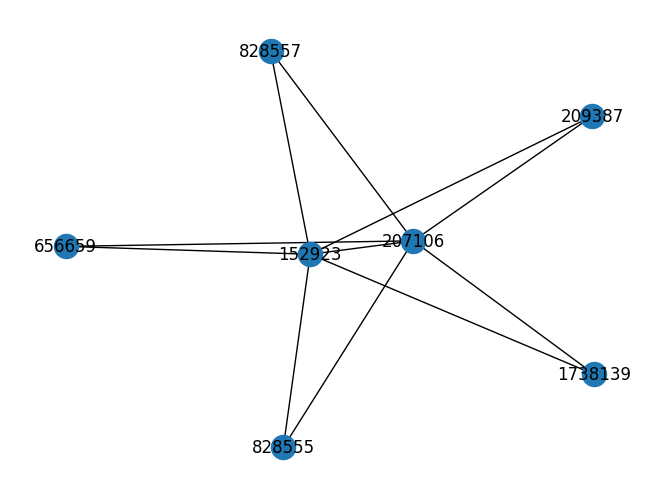

AttributeError: 'NoneType' object has no attribute 'title'

In [83]:
import networkx as nx
import matplotlib.pyplot as plt

def create_networkx_graph(your_graph):
    G = nx.Graph()
    for vertex in your_graph.vert_list.values():
        for edge in vertex.connectedTo.values():
            G.add_edge(edge.src.id, edge.dest.id)

    pos = nx.spring_layout(G)  # positions for all nodes
    nx.draw(G, pos, with_labels=True)
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    plt.show()

# Assuming you have an instance of your Graph class named 'graph'
create_networkx_graph(graph)